In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [12]:
# --- 1. Charger les fichiers ---
social = gpd.read_file("../data/indicateur_social.geojson")
limite_mtl = gpd.read_file("../data/Limites-administratives-agglomération/limites-administratives-agglomeration-nad83.shp")

# --- 2. Harmoniser les projections ---
social = social.to_crs(limite_mtl.crs)

# --- 3. Restreindre aux limites de Montréal (intersection spatiale) ---
social_mtl = gpd.overlay(social, limite_mtl, how="intersection")

# --- 4. Garder les colonnes pertinentes ---
colonnes_utiles = ["ADIDU", "NOTESOC", "CentSoc", "QuintSoc", "geometry"]
social_mtl = social_mtl[colonnes_utiles].copy()

# --- 5. Supprimer les lignes vides ---
social_mtl = social_mtl.dropna(subset=["NOTESOC", "geometry"])

# --- 6. Normaliser NOTESOC entre 0 et 1 ---
scaler = MinMaxScaler()
social_mtl["indice_social_norm"] = scaler.fit_transform(social_mtl[["NOTESOC"]])


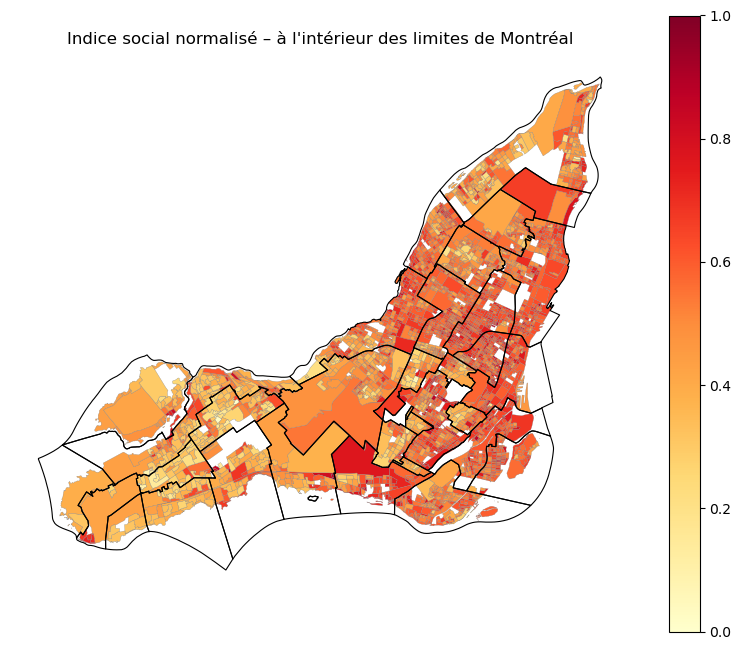

In [13]:

# --- 7. Visualisation ---
fig, ax = plt.subplots(figsize=(10, 8))
limite_mtl.boundary.plot(ax=ax, color="black", linewidth=0.8)
social_mtl.plot(
    column="indice_social_norm",
    cmap="YlOrRd",
    legend=True,
    linewidth=0.2,
    edgecolor="grey",
    ax=ax
)
ax.set_title("Indice social normalisé – à l'intérieur des limites de Montréal")
ax.axis("off")
plt.show()

In [14]:
# --- 7. Vérification de cohérence géométrique ---
social_mtl = social_mtl[social_mtl.is_valid]
social_mtl = social_mtl.explode(index_parts=False).reset_index(drop=True)

# --- 8. Enregistrer pour la fusion ---
social_mtl.to_file("../outputs/social_mtl_clean.geojson", driver="GeoJSON")

print("✅ Fichier social_mtl_clean.geojson prêt pour fusion.")
print(social_mtl.head())

✅ Fichier social_mtl_clean.geojson prêt pour fusion.
      ADIDU               NOTESOC  CentSoc  QuintSoc  indice_social_norm  \
0  24580156    0.0741809106884492       97         5            0.726906   
1  24660001    0.0144136108124636       64         4            0.538119   
2  24660001    0.0144136108124636       64         4            0.538119   
3  24660002    -0.059579917384798        6         1            0.304394   
4  24660003  -0.00403064559401301       49         3            0.479859   

                                            geometry  
0  POLYGON ((303281.999 5039519.989, 303278.002 5...  
1  POLYGON ((306576.005 5062431.997, 306573.999 5...  
2  POLYGON ((306498.003 5062340.999, 306505.001 5...  
3  POLYGON ((306137.108 5061850.749, 306191.682 5...  
4  POLYGON ((306034.891 5061996.626, 306078.44 50...  
